Done by Daniil Lyakhov (dupeljan@gmail.com)

src: https://qiskit.org/textbook/ch-algorithms/grover.html


# PROBLEM
Given function $f(x), x \in [0, 2^n-1]$ binary 

and

 $\exists ! x^* : f(x^*) = 1$,
 
  $\forall x, x \neq x^* -> f(x) = 0$

The problem is identify $x^*$. By classic algorithms you should check all cases in worst case, n/2  on average. Quantium computers can solve this task with $O(\sqrt(n))$ complexity.



# Recall 

that system state with n quants at each moment of algorithm defined as 
$|x> = \begin{bmatrix} a_{0,0,..0} \\ ... \\ a_{1,1,..,1}\end{bmatrix}$, $a_t \in C \forall t \in [0, 2^n-1] $ binary

 and


$\sum_{t \in [0, 2^n-1] binary} |a_{t}|^2 = 1$

The Inference (probability of qubit to be calculated as $|q> = |x_0,..,x_n> x_i \in [0,1]$ in basis of $|0>$, $|1>$ ) is defined

$P_{|q>}(|x>) = <x|q>$

  Define some speciall system states:

  $| w> =  \begin{bmatrix} 0 \\ ... \\ 0 \\ 1 \\ 0 \\ ... \\ 0\end{bmatrix}$ winner ket with only one '1' on place $x^*$ binary

  $| s> = \frac{1}{\sqrt{n}} \begin{bmatrix} 1 \\ 1 \\ ... \\ 1 \end{bmatrix}$ -Hadamar operator to zero qbits input, all basic solutions have the same probability to be calculated

  $| s^\prime> = \frac{1}{\sqrt{n-1}} \begin{bmatrix} 1 \\ ... \\ 1 \\ 0 \\ 1 \\ ... \\ 1\end{bmatrix}$ which has only one zero on $x^*$ binary place

# ALGORITHM

## Step 1

Given initial state as $|0,0,..,0> = \begin{bmatrix}1 \\ 0 \\ ... \\ 0 \end{bmatrix}$. By Hadamar operator translate initial state to uniform distributed state $|s>$, so now all possible sollutions are equally "right" for quantium circuit. 

So, we have $|s>$ state


## Step 2



Let's recall what is angle between two vectors in an vector space. Angle between two vectors is the shortest angle at which any of the two vectors is rotated about the other vector such that both of the vectors have the same direction. But how compute them? 

Let's recall dot product definition
$|a>, |b> $ - vectors, so 
dot product = (def) = $<a|b>$ = (def) = $|||a>|| |||b>||cos(\widehat{|a>,|b>})$

But one can show that it's $<a|b> = \sum_{x \in [0, 2^n-1] binary}|a_x> \cdot |b_x> $ where $|a_x>$ and $ |b_x>$ is correspondant porjection on basis vector x.

 States space is Euclid space thus dot product exist in this space and dot product represented as $<a|b>$, but under the hood it's usual Linear vector space with complex coordinates dot product. So, two vectors $|a>$ and $|b>$ defined as orhogonal if  $<a|b> = 0$

Let's look at $|w>$ and $|s>$ and $|s^\prime>$.

$<w|s^\prime> = 0$ by assembling, so this vectors are arthogonal and can be orhogonal basis. 

and vector has angle $\beta = arccos [cos \beta ] = arccos[\frac{<w|s>}{|||w>|| \cdot |||s>||}] = \begin{bmatrix} \\ ||w>|| = |||s|| = 1 \\ \end{bmatrix} = arccos[<w|s>] = arcos[\frac{1}{\sqrt n}] $

$\theta = \frac{\pi}{2} - \beta$

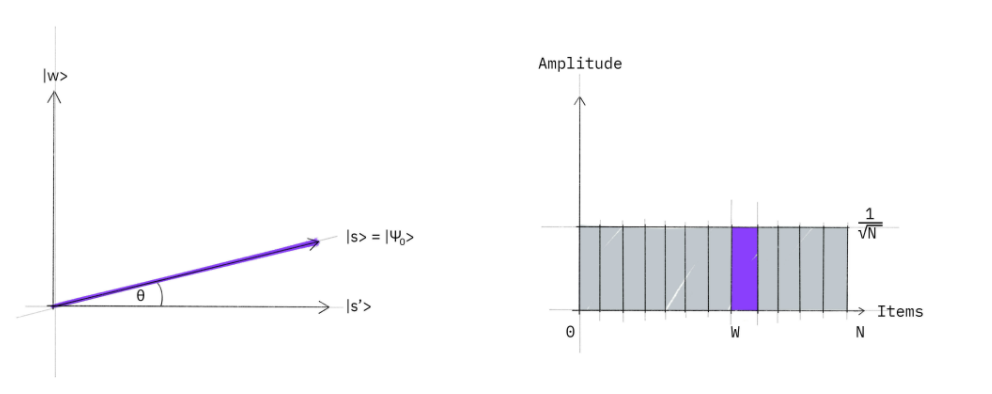

## Step 3
Apply $U_\omega$ operator to previous state:


$U_\omega = 
\begin{bmatrix}
(-1)^{f(0)} &   0         & \cdots &   0         \\
0           & (-1)^{f(1)} & \cdots &   0         \\
\vdots      &   0         & \ddots & \vdots      \\
0           &   0         & \cdots & (-1)^{f(2^n-1)} \\
\end{bmatrix} $ = 

$U_\omega = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\\
\\
\\
\leftarrow \omega = \text{101}\\
\\
\\
\\
\end{aligned}
$

At the end we have $U_\omega|s>$ state.

We've change only one coordinate correspond to $x^*$ thus now angle betwee n $|w>$ and current state is $-\beta$

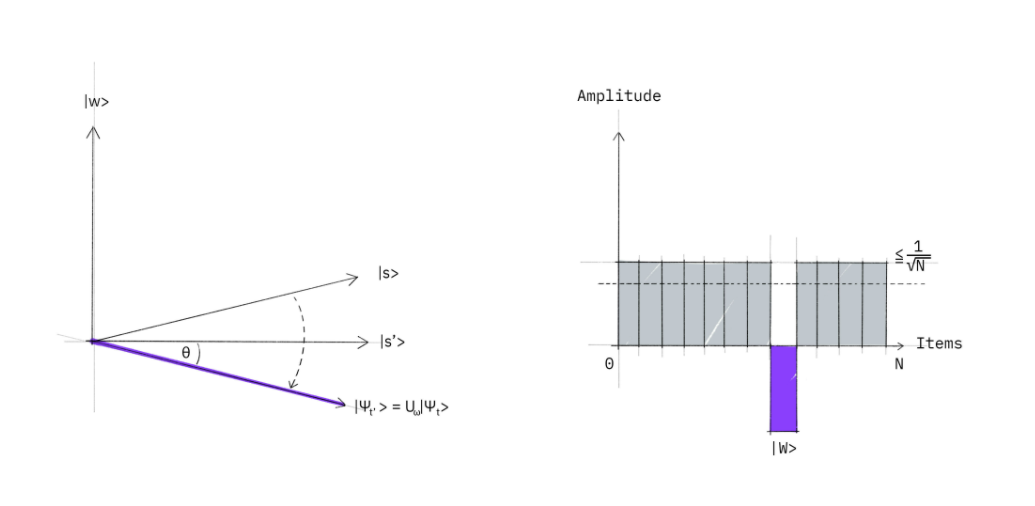

## Step 4

Now let's rotate circuit state around $|s>$ state. To do this we will employ Householder transformation formula: https://en.wikipedia.org/wiki/Householder_transformation. Given vectors |a> and |b>, to rotate |a> around |b> we should

1) build rotation matrix = $I - 2|b>{|b>}^H$ = | $H$ means  Hermitian transpose https://en.wikipedia.org/wiki/Conjugate_transpose| = (def) = $I - 2|b><b| = O$

2) rotate $|a>$ around $|b>$ by $O$ :

$O|a>$

Please find proof for this transformation by yourself :)

So, vector $U_\omega|s>$ , rotated around $|s>$ is 

$(I - 2|s><s|)|U_\omega |s> = |\psi>$


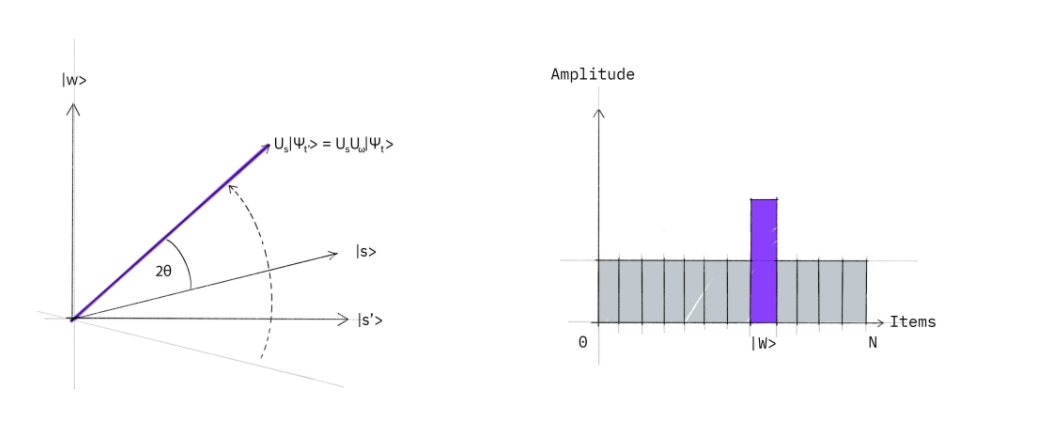

Now angle between current state $|\psi>$ and $|w>$ is $β - 2 \theta$ , $\theta > 0$, thus now probability of inference of right solution is higer that other. 

So, after that step 3 is repeated until $\sqrt{n}$ iteration was arhived. Algebraic analisys of why $\sqrt{n}$ is enough you can find here https://en.wikipedia.org/wiki/Grover%27s_algorithm   

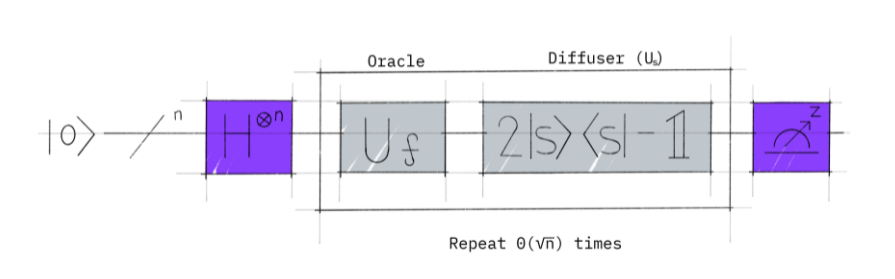

Futher research#

https://arxiv.org/pdf/1907.03315.pdf - Quantum Algorithm for Finding k-Minima, finds several solutions for $O(\sqrt{\frac{n}{k})}$

On top of article above
https://arxiv.org/pdf/2003.09187.pdf - Quantum k nearest neighbors algorithm, 
which allows you to find nearests neighbords faster and can work with pure quantium states